<a href="https://colab.research.google.com/github/varun2407/Sign-Language-Detection/blob/main/Copy_of_CS666_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

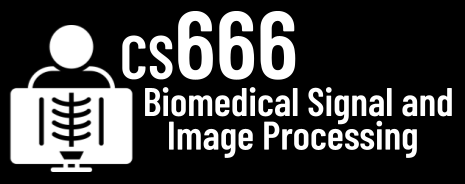
#Assignment 5

In [8]:
# NAME: Varun Sanjay Shembekar

In [9]:
# In this assignment, we will visualize and explore a CT scan!

In [10]:
# load numpy and matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
# we are using pydicom, so lets install it!
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Task 1**: Download and visualize data with SliceDrop! [20 Points]

In [12]:
# Please download https://cs666.org/data/ct.zip and extract it on your computer!
# This is a CT scan of an arm in DICOM format.

In [13]:
# 1) Let's explore the data without loading it.
# TODO: Without loading the data, how many slices are there?

In [14]:
# TODO: There are 220 slices

In [15]:
# 2) Let's visualize the data with SliceDrop! 
# Go to https://slicedrop.com and drag'n'drop all .dcm files into the browser.
# Please use the 2D sliders to show axial, sagittal, and coronal slices in 3D.

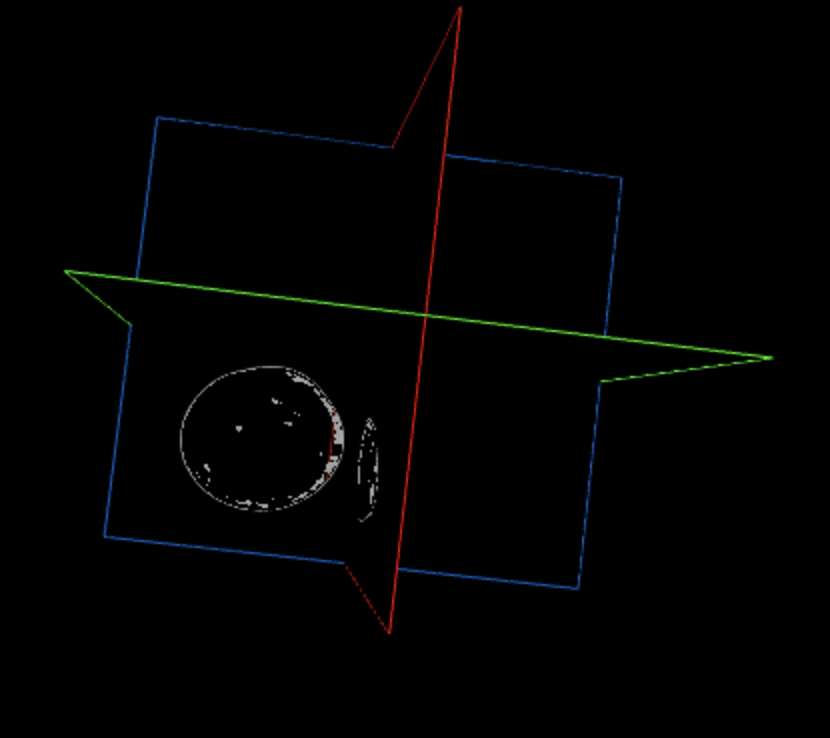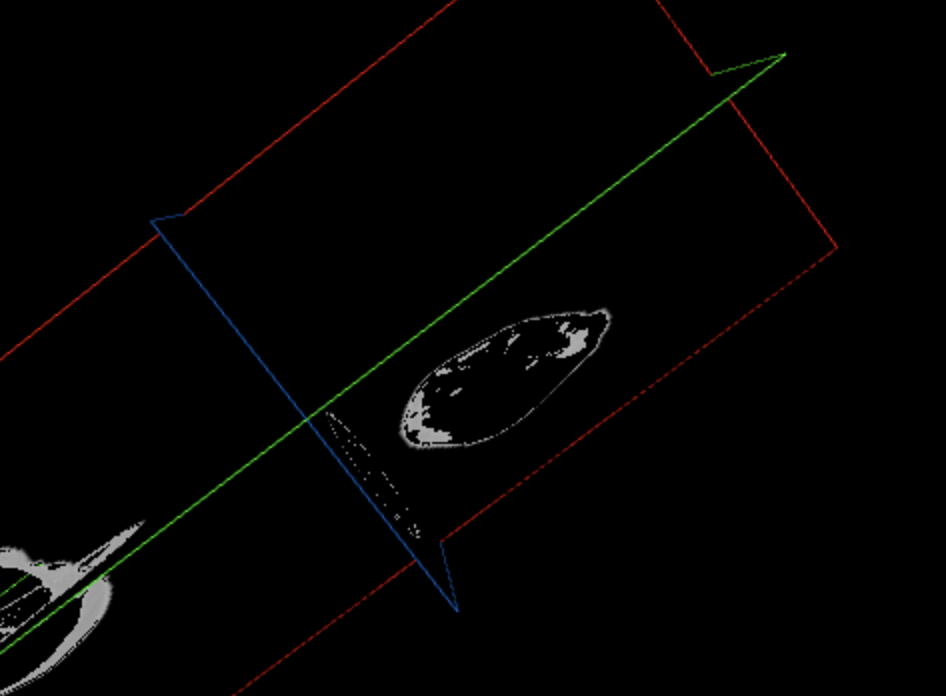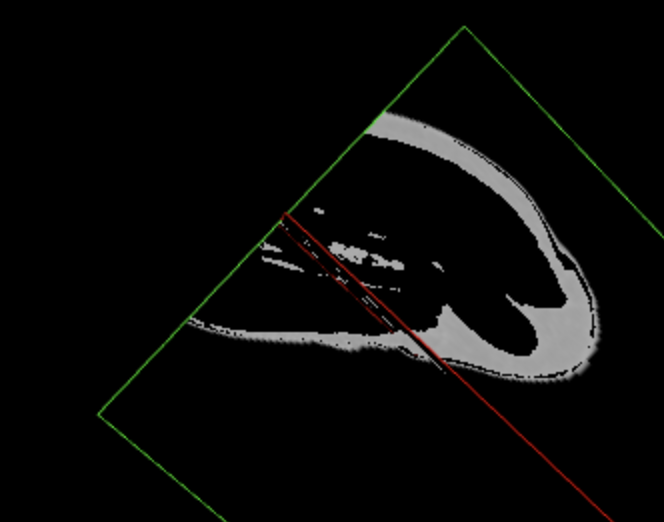

In [16]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click. This should not be volume
# rendering but show the 3 cross sections.

In [17]:
# 3) Let's visualize only the bones! Please use the thresholding
# based on a window suitable for bones and show a 3D volume rendering.

In [18]:
# TODO Please post a screenshot of SliceDrop's 3D View in the text box below by 
# using the Upload image button after double-click.

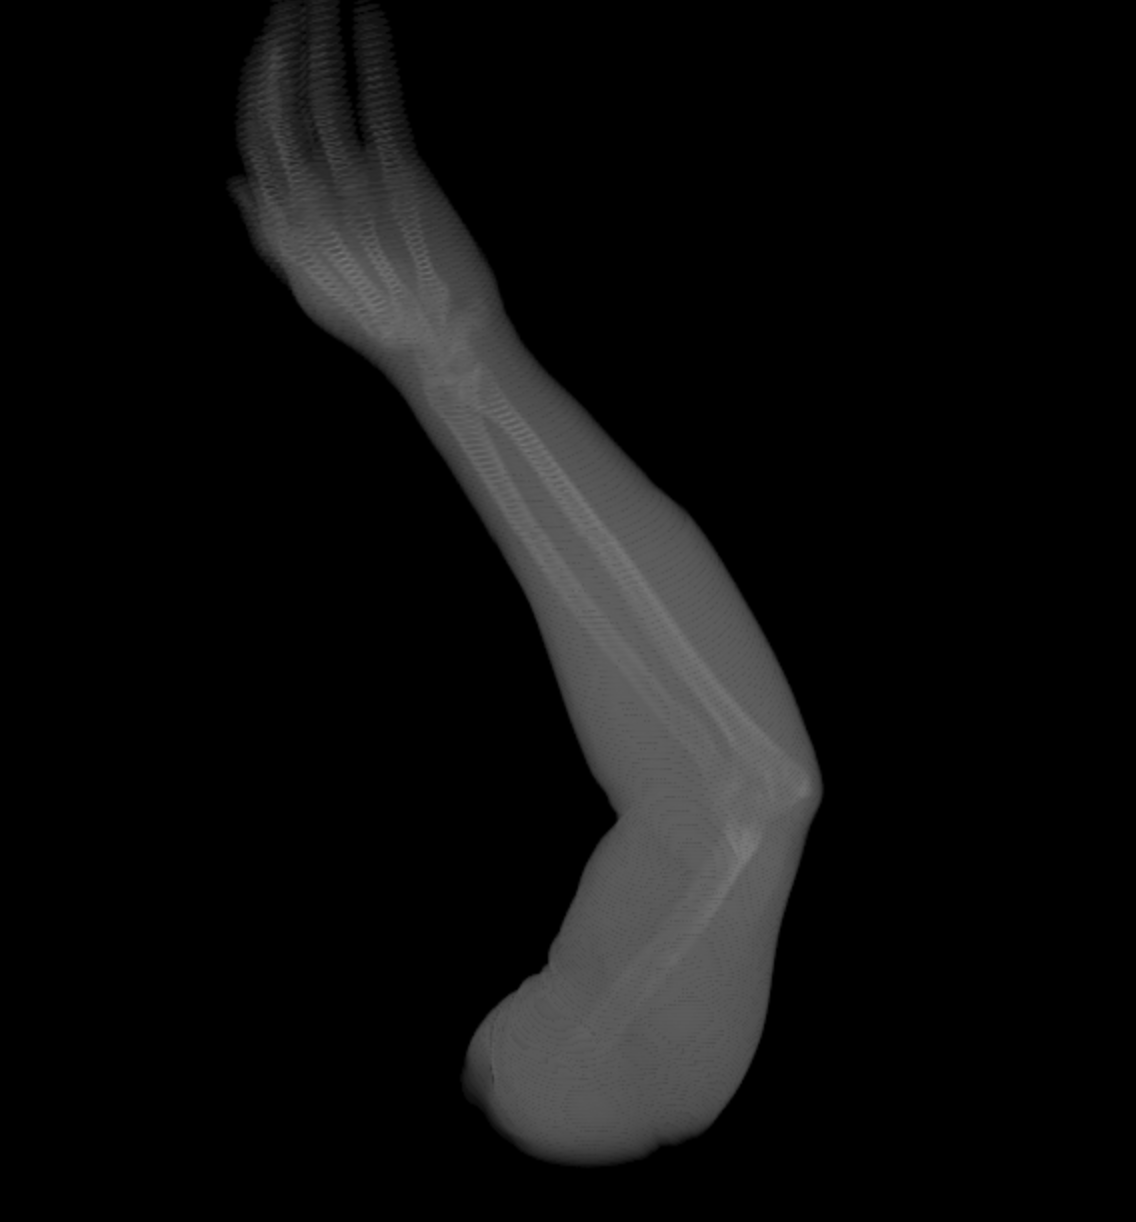

**Task 2**: Load the data using pydicom as a 3D volume and then reslice it! [35 Points]

In [19]:
# TODO: Please upload ct.zip using the file panel on the left.
# Then use the following snippet to extract the data.

In [1]:
import zipfile
with zipfile.ZipFile('ct.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
# 1) Now loop through all the DICOM files and store them in a 3D numpy array.
# Hint: You can either store them in a list first or read the dimensions of a
# single image slice to properly create the 3D numpy array.
# Hint 2: os.listdir(DIR) gives a list of filenames in a directory.
# Hint 2b: This list is not sorted - make sure you sort it.
# Hint 3: The dcmread function loads a single DICOM file.
# Hint 4: You can then use .pixel_array to access the image data.

In [ ]:
from pydicom import dcmread

In [2]:
# TODO: YOUR CODE FOR LOADING THE VOLUME AS A 3D NUMPY ARRAY

import os
import numpy as np
import pydicom

DIR = './ct/'

files = os.listdir(DIR)
files.sort()

img = pydicom.dcmread(os.path.join(DIR, files[0]))
height, width = img.Rows, img.Columns

depth = len(files)
data = np.zeros((depth, height, width), dtype=np.uint16)

for i, filename in enumerate(files):
    img = pydicom.dcmread(os.path.join(DIR, filename))
    data[i, :, :] = img.pixel_array

print(data.shape)


(220, 454, 512)


In [ ]:
# 2) Now create and show axial, sagittal, and coronal slices from the 3D volume.
# Hint: Please use imshow(XX, cmap='gray') to show the image.

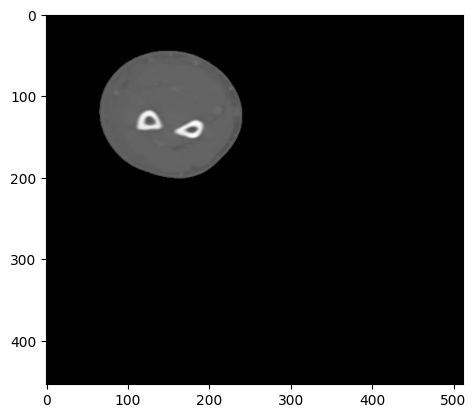

In [7]:
# TODO: YOUR CODE FOR AXIAL
import matplotlib.pyplot as plt
axial_slice = data[data.shape[0] // 2, :, :]
plt.imshow(axial_slice, cmap='gray')
plt.show()

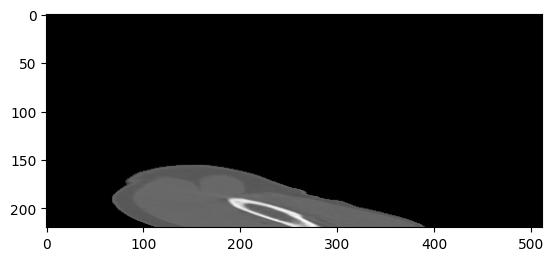

In [8]:
# TODO: YOUR CODE FOR SAGITTAL
sagittal_slice = data[:, data.shape[1] // 2, :]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()


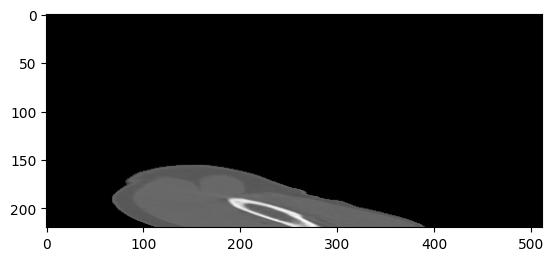

In [9]:
# TODO: YOUR CODE FOR CORONAL
coronal_slice = data[:, data.shape[2] // 2]
plt.imshow(sagittal_slice, cmap='gray')
plt.show()

**Task 3**: Use the Window/Level-technique to visualize the data! [45 Points]

In [ ]:
# We will now enhance the visualization from above by performing 
# Window/Level adjustment.
# Here is one way of doing that:
#   vmin = level - window/2
#   vmax = level + window/2
#   plt.imshow(hu_pixels + rescale, cmap='gray', vmin=vmin, vmax=vmax)
#   plt.show()

In [ ]:
# 1) Please load the Window/Level values from the DICOM file,
# print these values, and then visualize one slice with window/level adjustment.
# Hint: The DICOM header has the following tags.
#   (0028, 1050) Window Center 
#   (0028, 1051) Window Width
# Hint 2: You can use slice[key].value to access DICOM tag values.
# Hint 3: (0028, 1052) Rescale Intercept might be important.

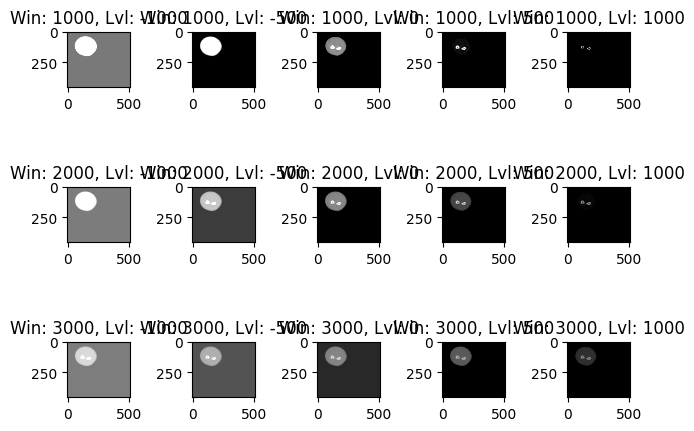

In [11]:
# TODO: YOUR CODE
dicom_file = pydicom.dcmread(os.path.join(DIR, files[0]))
win = dicom_file.WindowWidth
lvl = dicom_file.WindowCenter
res = dicom_file.RescaleIntercept

# Define some window/level values to test
test_wins = [1000, 2000, 3000]
test_lvls = [-1000, -500, 0, 500, 1000]

# Show each test image with the original and modified window/level values
for i, test_win in enumerate(test_wins):
    for j, test_lvl in enumerate(test_lvls):
        vmin = test_lvl - test_win/2
        vmax = test_lvl + test_win/2
        
        plt.subplot(len(test_wins), len(test_lvls), i*len(test_lvls) + j + 1)
        plt.imshow(data[110] + res, cmap='gray', vmin=vmin, vmax=vmax)
        plt.title(f"Win: {test_win}, Lvl: {test_lvl}")
        
plt.tight_layout()
plt.show()

#References: Asked Sukruth Kotturu for help

In [ ]:
# 2) Play around with different Window/Level values that enhance
# the visualization.

In [ ]:
# Which values make sense and why?

In [ ]:
#For window_center and window_width values: it is important to decide on the window technique. If you want a sharper image of the highlights or the whole image, you can change either value according to your needs. However, you can specify a value larger than the width to conveniently visualize the central portion.

**Bonus**: Create segmentations (label maps) for the volume using thresholding HU! [33 Points]

In [ ]:
# Similar to Window/Level adjustment for visualization, we can threshold
# the volume to highlight the following components using the Hounsfield Units:
# 1) Fat
# 2) Soft Tissue
# 3) Bones
#
# Please create 3 segmentation masks for these structures.
# Then, please visualize each 3 slices per structure to showcase the segmentation.
# Hint: As a reminder, the following code allows thresholding of a numpy array.
#   new_mask = imagevolume.copy()
#   new_mask[new_mask < XXX] = 0
# Hint2: You might need to cast new_mask to int16 not uint16.

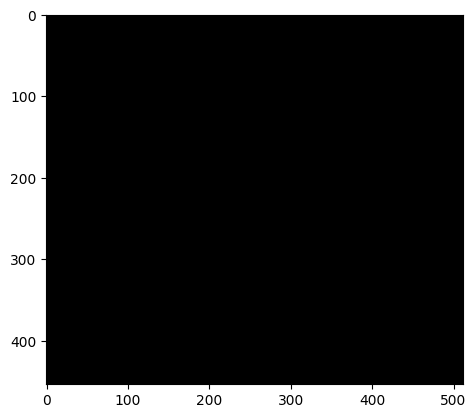

In [20]:
# TODO: YOUR CODE TO SEGMENT FAT

fat_mask = data.copy()
fat_mask[fat_mask > -60] = 0
fat_mask = np.int16(fat_mask)
plt.imshow(fat_mask[110, :, :], cmap='gray')
plt.show()

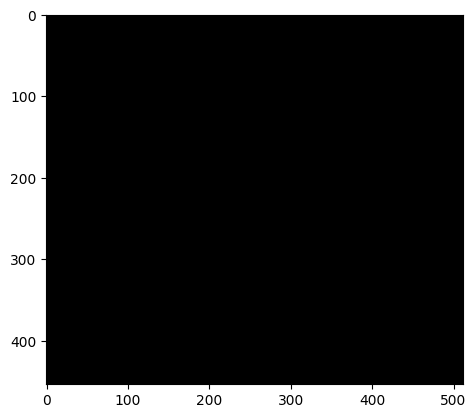

In [21]:
# TODO: YOUR CODE TO SEGMENT SOFT TISSUE
soft_tissue_mask = data.copy()
soft_tissue_mask[soft_tissue_mask < 30] = 0
soft_tissue_mask[soft_tissue_mask > 100] = 0
soft_tissue_mask = np.int16(soft_tissue_mask)
plt.imshow(soft_tissue_mask[110, :, :], cmap='gray')
plt.show()

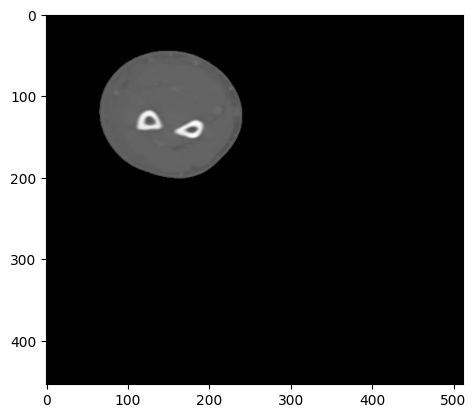

In [22]:
# TODO: YOUR CODE TO SEGMENT BONES
bone_mask = data.copy()
bone_mask[bone_mask < 300] = 0
bone_mask = np.int16(bone_mask)
plt.imshow(bone_mask[110, :, :], cmap='gray')
plt.show()

In [ ]:
# Are the segmentations good?

In [ ]:
# TODO: No, because the fat and soft tissue segments do not return anything and it could be a problem with the data rather than the segmentation techniques used.

In [ ]:
#
# Thank you and Great job!!
#
#                _.---._
#              .'       `.
#              :)       (:
#              \ (@) (@) /
#               \   A   /
#                )     (
#                \"""""/
#                 `._.'
#                  .=.
#          .---._.-.=.-._.---.
#         / ':-(_.-: :-._)-:` \
#        / /' (__.-: :-.__) `\ \
#       / /  (___.-` '-.___)  \ \
#      / /   (___.-'^`-.___)   \ \
#     / /    (___.-'=`-.___)    \ \
#    / /     (____.'=`.____)     \ \
#   / /       (___.'=`.___)       \ \
#  (_.;       `---'.=.`---'       ;._)
#  ;||        __  _.=._  __        ||;
#  ;||       (  `.-.=.-.'  )       ||;
#  ;||       \    `.=.'    /       ||;
#  ;||        \    .=.    /        ||;
#  ;||       .-`.`-._.-'.'-.       ||;
# .:::\      ( ,): O O :(, )      /:::.
# |||| `     / /'`--'--'`\ \     ' ||||
# ''''      / /           \ \      ''''
#          / /             \ \
#         / /               \ \
#        / /                 \ \
#       / /                   \ \
#      / /                     \ \
#     /.'                       `.\
#    (_)'                       `(_)
#     \\.                       .//
#      \\.                     .//
#       \\.                   .//
#        \\.                 .//
#         \\.               .//
#          \\.             .//
#     jgs   \\.           .//
#           ///)         (\\\
#         ,///'           `\\\,
#        ///'               `\\\
#       ""'                   '""